In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
word = pd.read_csv("data-dictionary.csv")
word

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [3]:
country_data = pd.read_csv("Country-data.csv")
country = country_data["country"]

country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100

country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [4]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
data_copy = country_data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
data_copy.drop_duplicates(subset=None, inplace=True)

print(data_copy.shape, country_data.shape)

(167, 10) (167, 10)


In [6]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country_data.isnull().sum().value_counts(ascending=False)

0    10
Name: count, dtype: int64

In [8]:
country_data.isnull().sum(axis = 1).value_counts(ascending=False)

0    167
Name: count, dtype: int64

In [9]:
df = country_data.drop(['country'], axis=1)

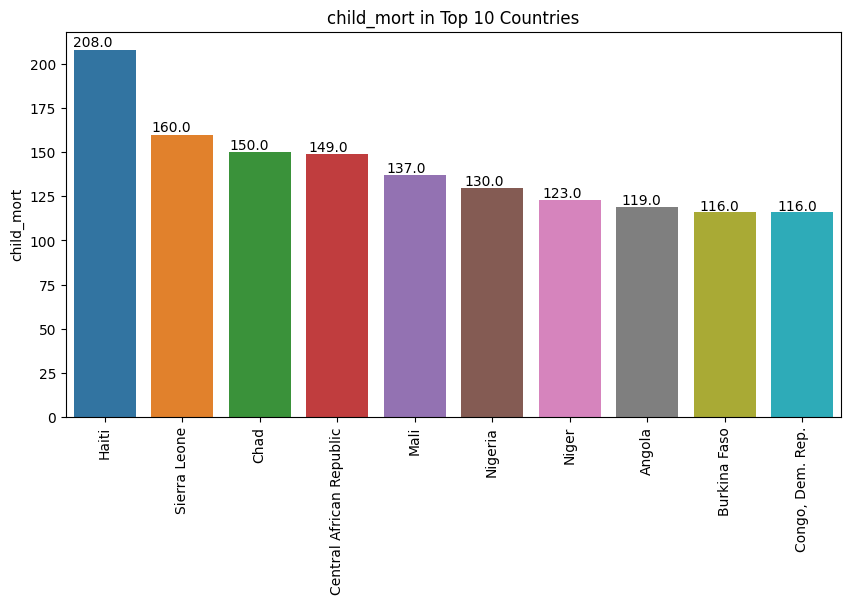

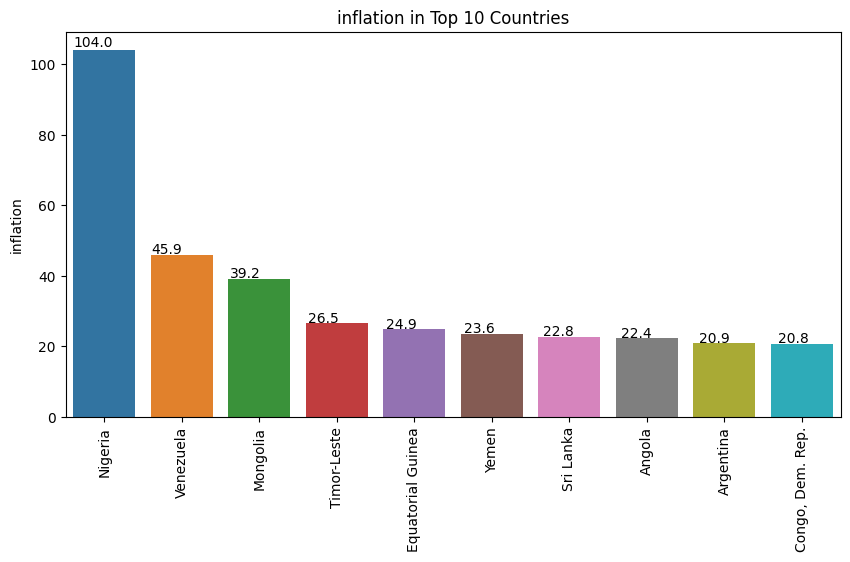

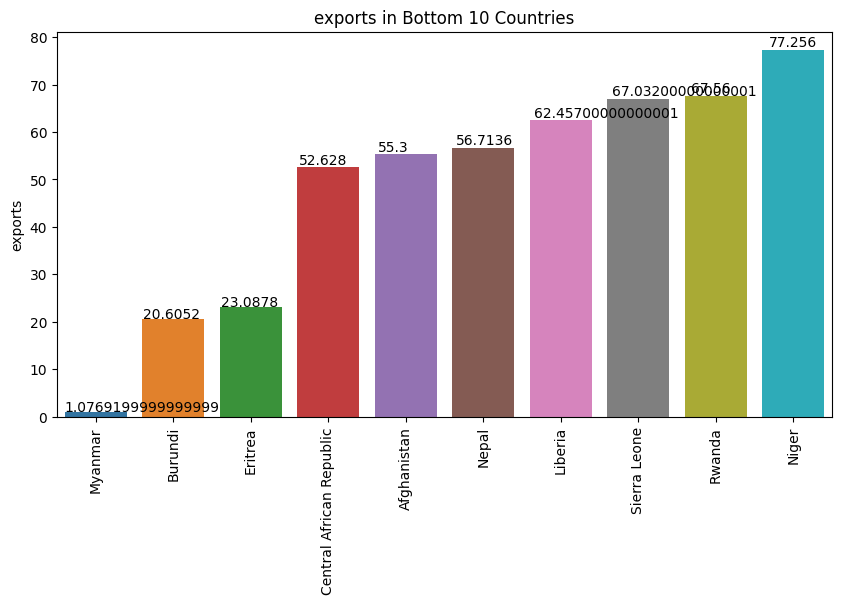

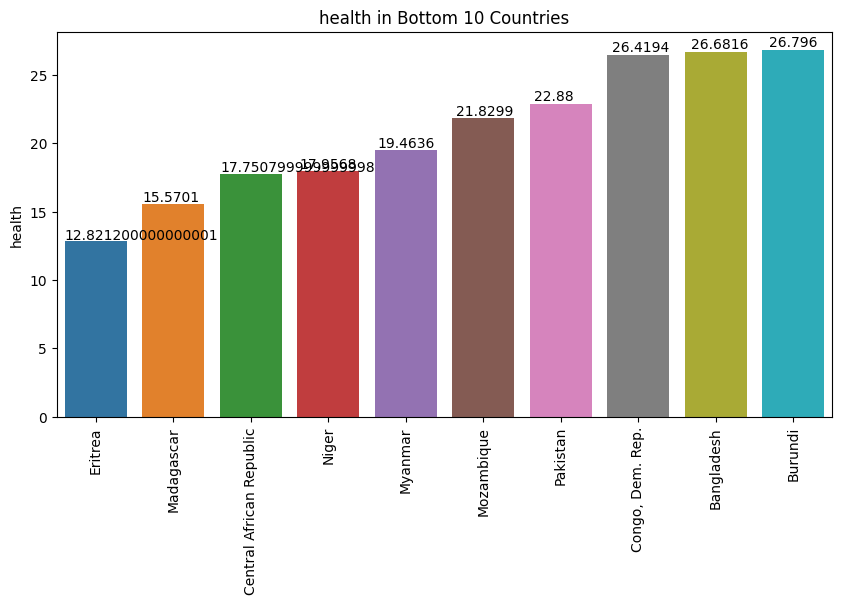

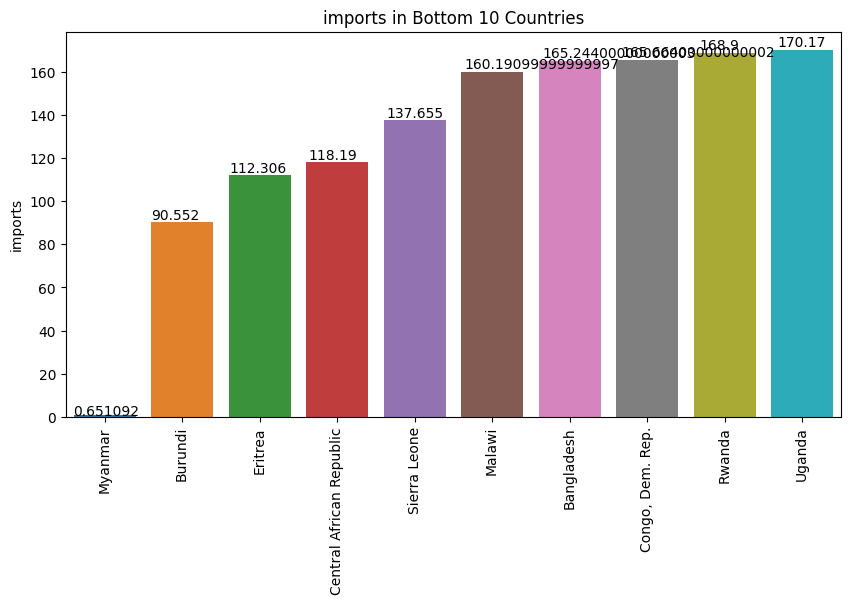

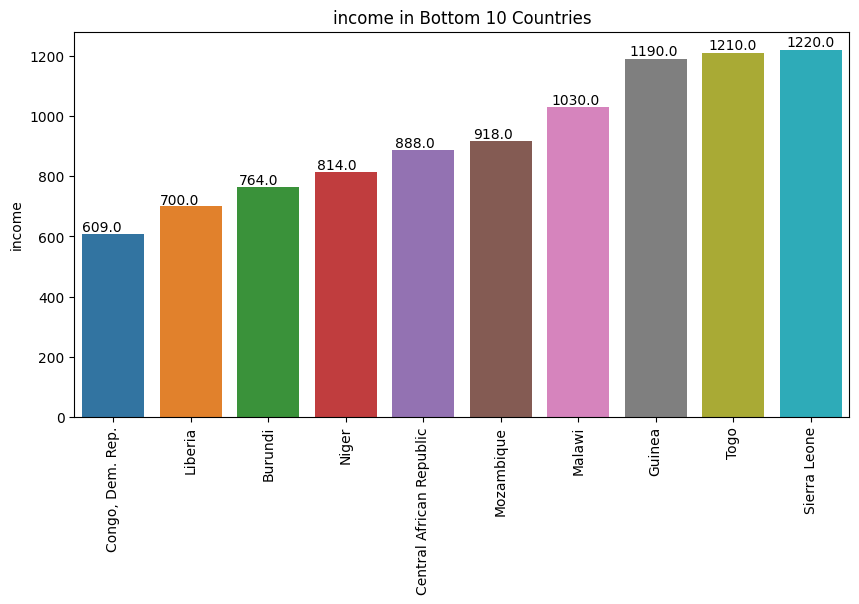

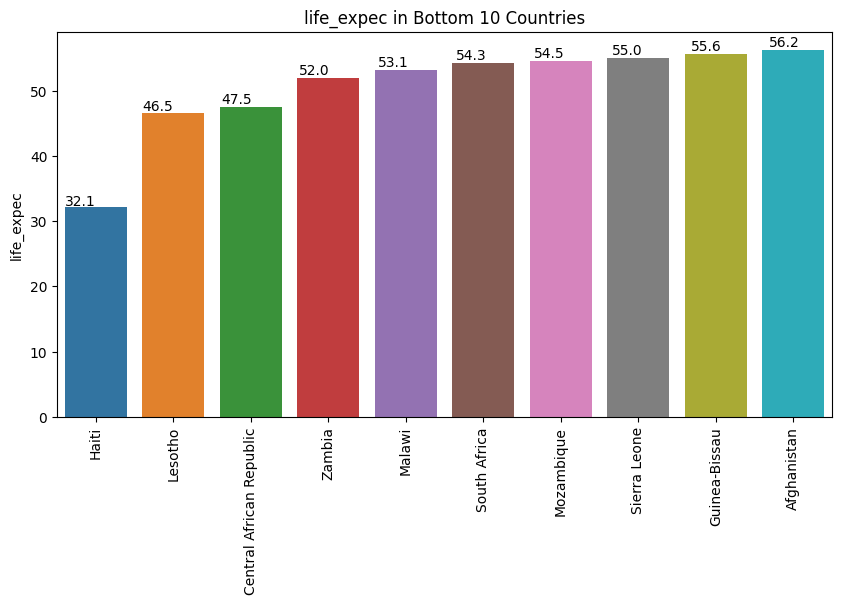

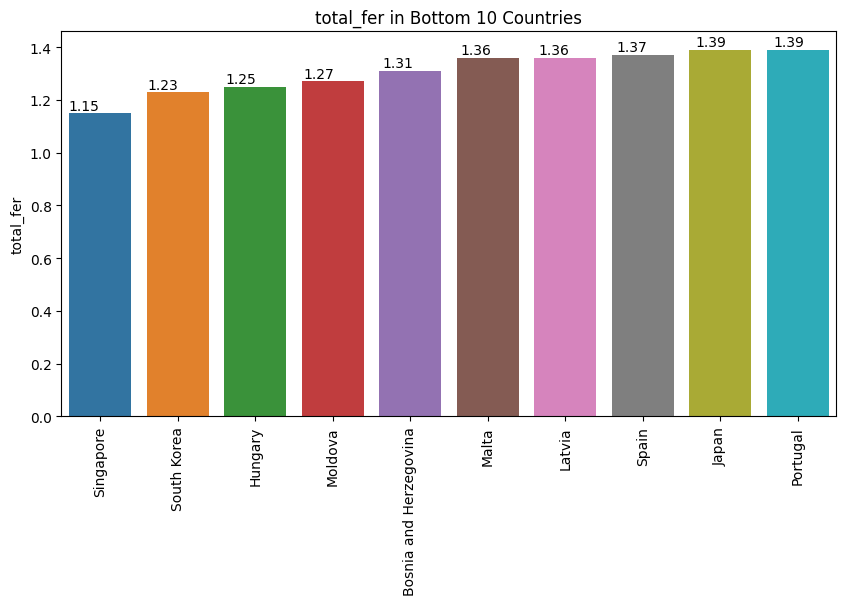

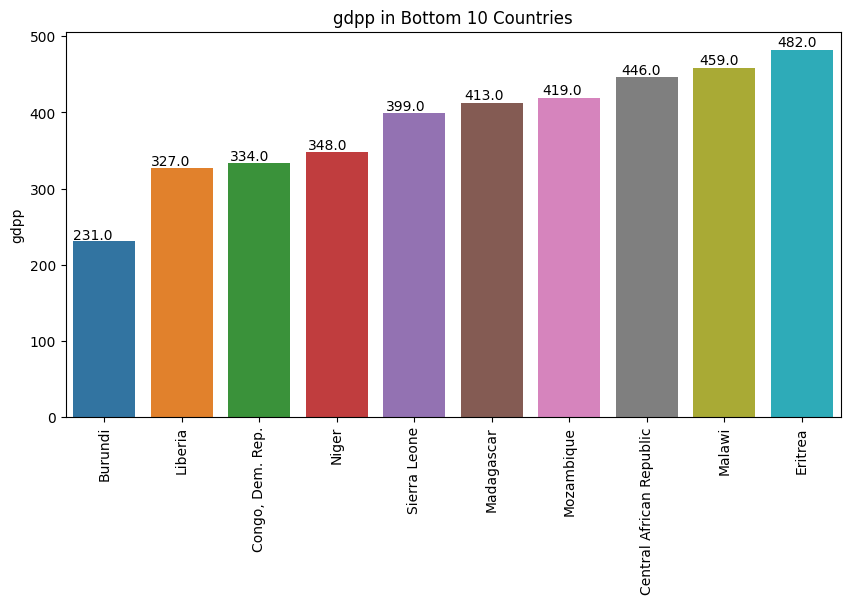

In [10]:
top_features = ["child_mort", "inflation"]
bottom_features = ["exports", "health", "imports", "income", "life_expec", "total_fer", "gdpp"]

for i in top_features:
    plt.figure(figsize = (10,5))
    top10 = country_data[['country',i]].sort_values(i, ascending = False).head(10)
    ax = sns.barplot(x='country', y=i, data = top10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel=i)
    plt.title(f"{i} in Top 10 Countries")
    plt.xticks(rotation=90)
    plt.show()

for i in bottom_features:
    plt.figure(figsize = (10,5))
    bottom10 = country_data[['country',i]].sort_values(i, ascending = True).head(10)
    ax = sns.barplot(x='country', y=i, data = bottom10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel=i)
    plt.title(f"{i} in Bottom 10 Countries")
    plt.xticks(rotation=90)
    plt.show()

In [11]:
mean_values = np.mean(df, axis=0)
std_dev_values = np.std(df, axis=0)
std_data = (df - mean_values) / std_dev_values
std_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [12]:
print(f'Shape of std_data: {std_data.shape}')   # covariance matrix calculation
features = std_data.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]
   

Shape of std_data: (167, 9)
Shape of features: (9, 167)
Shape of cov_matrix: (9, 9)

Sneak Peak of the covariance matrix:



array([[ 1.0060241 , -0.29902078, -0.43303092, -0.32106013, -0.52747354],
       [-0.29902078,  1.0060241 ,  0.61661082,  0.99363602,  0.72972099],
       [-0.43303092,  0.61661082,  1.0060241 ,  0.6424278 ,  0.69501914],
       [-0.32106013,  0.99363602,  0.6424278 ,  1.0060241 ,  0.6761047 ],
       [-0.52747354,  0.72972099,  0.69501914,  0.6761047 ,  1.0060241 ]])

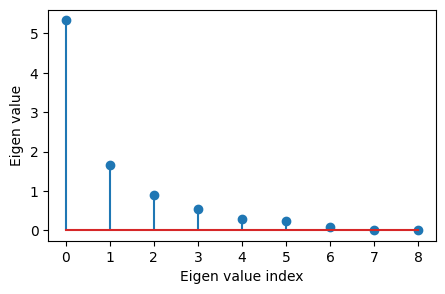

In [13]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

plt.figure(figsize=(5,3))
plt.stem(eig_values[:200])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [14]:
for i in range(10):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 58.93729841981105 % variance
Eigenvectors upto 2 expresses 77.38246693687758 % variance
Eigenvectors upto 3 expresses 87.29393863335554 % variance
Eigenvectors upto 4 expresses 93.36621664004693 % variance
Eigenvectors upto 5 expresses 96.39538916694671 % variance
Eigenvectors upto 6 expresses 98.85521618909016 % variance
Eigenvectors upto 7 expresses 99.7949598897963 % variance
Eigenvectors upto 8 expresses 99.95060186058892 % variance
Eigenvectors upto 9 expresses 100.0 % variance
Eigenvectors upto 10 expresses 100.0 % variance


In [15]:
std_data = std_data.to_numpy()
result = np.dot(std_data.reshape((-1, 9)), eig_vectors[:,:50].reshape((9, -1)))
result.shape

(167, 9)

In [16]:
projected_1 = std_data.dot(eig_vectors.T[0])
projected_2 = std_data.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Country'] = country
res2d

,PC1,PC2,Country
0,-2.635575,1.472267,Afghanistan
1,-0.024206,-1.429892,Albania
2,-0.459557,-0.675495,Algeria
3,-2.722630,2.172332,Angola
4,0.648597,-1.023437,Antigua and Barbuda
...,...,...,...
162,-1.175210,-0.275652,Vanuatu
163,-0.314228,-0.016266,Venezuela
164,-0.594449,-1.076335,Vietnam
165,-1.802372,0.588729,Yemen


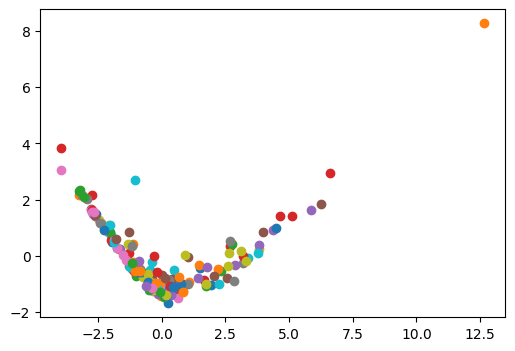

In [17]:
selected_labels = country.to_numpy()
plt.figure(figsize=(6,4))
for label in selected_labels:
    coords = res2d[res2d['Country']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label)

plt.show()

In [18]:
projected_1 = std_data.dot(eig_vectors.T[0])
projected_2 = std_data.dot(eig_vectors.T[1])
projected_3 = std_data.dot(eig_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Country'] = country
res3d

,PC1,PC2,PC3,Country
0,-2.635575,1.472267,0.549489,Afghanistan
1,-0.024206,-1.429892,0.014123,Albania
2,-0.459557,-0.675495,-0.959355,Algeria
3,-2.722630,2.172332,-0.600215,Angola
4,0.648597,-1.023437,0.257430,Antigua and Barbuda
...,...,...,...,...
162,-1.175210,-0.275652,0.667131,Vanuatu
163,-0.314228,-0.016266,-3.680273,Venezuela
164,-0.594449,-1.076335,-0.528875,Vietnam
165,-1.802372,0.588729,-1.180851,Yemen


Text(0.5, 0, 'PC3')

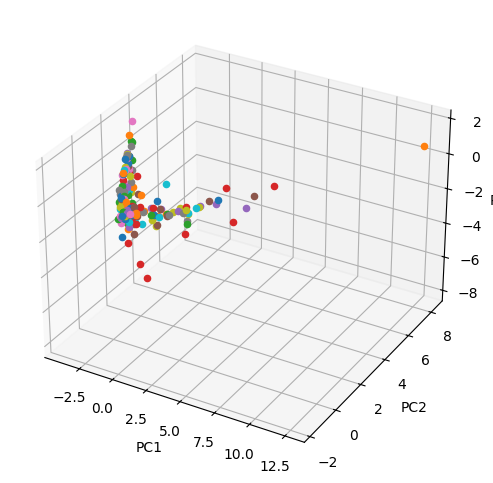

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

for label in selected_labels:
    coords = res3d[res3d['Country']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [20]:
projected_1 = std_data.dot(eig_vectors.T[0])
projected_2 = std_data.dot(eig_vectors.T[1])
projected_3 = std_data.dot(eig_vectors.T[2])
projected_4 = std_data.dot(eig_vectors.T[3])
projected_5 = std_data.dot(eig_vectors.T[4])
#projected_6 = std_data.dot(eig_vectors.T[5])
#projected_7 = std_data.dot(eig_vectors.T[6])
res5d = pd.DataFrame(projected_1, columns=['PC1'])
res5d['PC2'] = projected_2
res5d['PC3'] = projected_3
res5d['PC4'] = projected_4
res5d['PC5'] = projected_5
#res5d['PC6'] = projected_6
#res4d['PC7'] = projected_7
res5d['Country'] = country
res5d

,PC1,PC2,PC3,PC4,PC5,Country
0,-2.635575,1.472267,0.549489,0.242326,0.023530,Afghanistan
1,-0.024206,-1.429892,0.014123,-0.450645,-0.125821,Albania
2,-0.459557,-0.675495,-0.959355,-0.218456,-0.113275,Algeria
3,-2.722630,2.172332,-0.600215,0.433978,0.005433,Angola
4,0.648597,-1.023437,0.257430,-0.289201,0.072694,Antigua and Barbuda
...,...,...,...,...,...,...
162,-1.175210,-0.275652,0.667131,-0.279628,-0.119733,Vanuatu
163,-0.314228,-0.016266,-3.680273,-0.011835,-0.460468,Venezuela
164,-0.594449,-1.076335,-0.528875,-0.508854,-0.328297,Vietnam
165,-1.802372,0.588729,-1.180851,0.020241,-0.315724,Yemen


In [21]:
pca_df = res5d.drop(['Country'],axis=1)

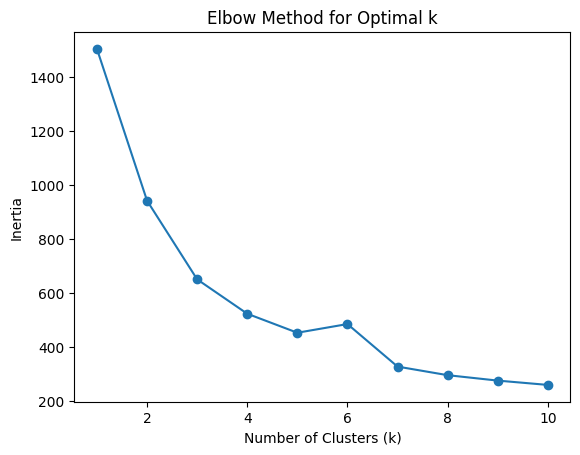

In [22]:
def K_Means(X, k, num_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(num_iterations):
        distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)
        
        centroids = np.array([np.mean(X[labels == j], axis=0) for j in range(k)])
    
    return labels

inertia_values = []
for k in range(1, 11):
    labels = K_Means(result, k)
    centroids = np.array([np.mean(result[labels == j], axis=0) for j in range(k)])
    inertia_values.append(np.sum((result - centroids[labels])**2))

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [23]:
optimal_k = 3

k_means_labels = K_Means(result, optimal_k)
centroids = np.array([np.mean(result[k_means_labels == j], axis=0) for j in range(optimal_k)])

pca_df['Country'] = country_data['country']
pca_df['Cluster'] = k_means_labels

#pca_df['Cluster'].replace(5, 6, inplace=True)
#pca_df['Cluster'].replace(4, 5, inplace=True)
pca_df['Cluster'].replace(3, 4, inplace=True)
pca_df['Cluster'].replace(2, 3, inplace=True)
pca_df['Cluster'].replace(1, 2, inplace=True)
pca_df['Cluster'].replace(0, 1, inplace=True)

pca_df

,PC1,PC2,PC3,PC4,PC5,Country,Cluster
0,-2.635575,1.472267,0.549489,0.242326,0.023530,Afghanistan,2
1,-0.024206,-1.429892,0.014123,-0.450645,-0.125821,Albania,1
2,-0.459557,-0.675495,-0.959355,-0.218456,-0.113275,Algeria,1
3,-2.722630,2.172332,-0.600215,0.433978,0.005433,Angola,2
4,0.648597,-1.023437,0.257430,-0.289201,0.072694,Antigua and Barbuda,1
...,...,...,...,...,...,...,...
162,-1.175210,-0.275652,0.667131,-0.279628,-0.119733,Vanuatu,1
163,-0.314228,-0.016266,-3.680273,-0.011835,-0.460468,Venezuela,1
164,-0.594449,-1.076335,-0.528875,-0.508854,-0.328297,Vietnam,1
165,-1.802372,0.588729,-1.180851,0.020241,-0.315724,Yemen,2


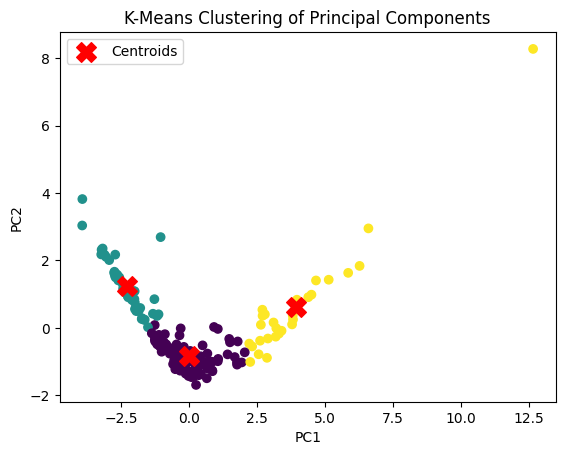

In [24]:
plt.scatter(result[:, 0], result[:, 1], c=k_means_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering of Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [25]:
cluster_1_countries = pca_df[pca_df['Cluster'] == 1]['Country']
print('\nCountries belonging to Cluster 1:')
print(cluster_1_countries)


Countries belonging to Cluster 1:
1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: Country, Length: 91, dtype: object


In [26]:
cluster_2_countries = pca_df[pca_df['Cluster'] == 2]['Country']
print('\nCountries belonging to Cluster 2:')
print(cluster_2_countries)


Countries belonging to Cluster 2:
0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99   

In [27]:
cluster_3_countries = pca_df[pca_df['Cluster'] == 3]['Country']
print('\nCountries belonging to Cluster 3:')
print(cluster_3_countries)


Countries belonging to Cluster 3:
7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: Country, dtype: object


In [28]:
cluster_4_countries = pca_df[pca_df['Cluster'] == 4]['Country']
print('\nCountries belonging to Cluster 4:')
print(cluster_4_countries)


Countries belonging to Cluster 4:
Series([], Name: Country, dtype: object)


In [29]:
#cluster_5_countries = pca_df[pca_df['Cluster'] == 5]['Country']
#print('\nCountries belonging to Cluster 5:')
#print(cluster_5_countries)

In [30]:
def sse(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

sse_value = sse(result, k_means_labels, centroids)
silhouette = silhouette_score(result, k_means_labels, metric = 'euclidean')
ch_index = calinski_harabasz_score(result, k_means_labels)
db_index = davies_bouldin_score(result, k_means_labels)

print(f'SSE: {sse_value}')
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {ch_index}')
print(f'Davies-Bouldin Score: {db_index}')

SSE: 651.3820515830141
Silhouette Score: 0.4218615812599682
Calinski-Harabasz Score: 107.206932706363
Davies-Bouldin Score: 0.8566309261596494
